## Assignment on K Nearest Neighbours with user defined functions

- Name: Jahnavi Murali
- Reg No.: 3122 21 5001 038

### Objective

Develop a python program to predict the Online Shoppers Purchasing Intention using K-Nearest
Neighbour algorithm. Visualize the features from the dataset and interpret the results obtained
by the model using Matplotlib library

### Imports

In [20]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import pairwise_distances, roc_curve, auc

### Loading data

In [7]:
shopping_online = pd.read_csv('C:/Users/JAHNAVI/Desktop/ML-Lab/A5/archive/online_shoppers_intention.csv')
shopping_online.shape

(12330, 18)

In [8]:
shopping_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Preprocessing

In [9]:
# Check for null values
shopping_online.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
# Encoding categorical variables
for col in shopping_online.select_dtypes(include=['object','bool']).columns:

    # Printing categorical variables
    print(f"{col}: {shopping_online[col].unique()}")

for col in shopping_online.select_dtypes(include=['object','bool']).columns:
 
    shopping_online[col] = shopping_online[col].astype(str)

    label_encoder = preprocessing.LabelEncoder()

    label_encoder.fit(shopping_online[col].unique())

    shopping_online[col] = label_encoder.transform(shopping_online[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {shopping_online[col].unique()}")

Month: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
VisitorType: ['Returning_Visitor' 'New_Visitor' 'Other']
Weekend: [False  True]
Revenue: [False  True]
Month: [2 5 6 8 4 3 0 7 9 1]
VisitorType: [2 0 1]
Weekend: [0 1]
Revenue: [0 1]


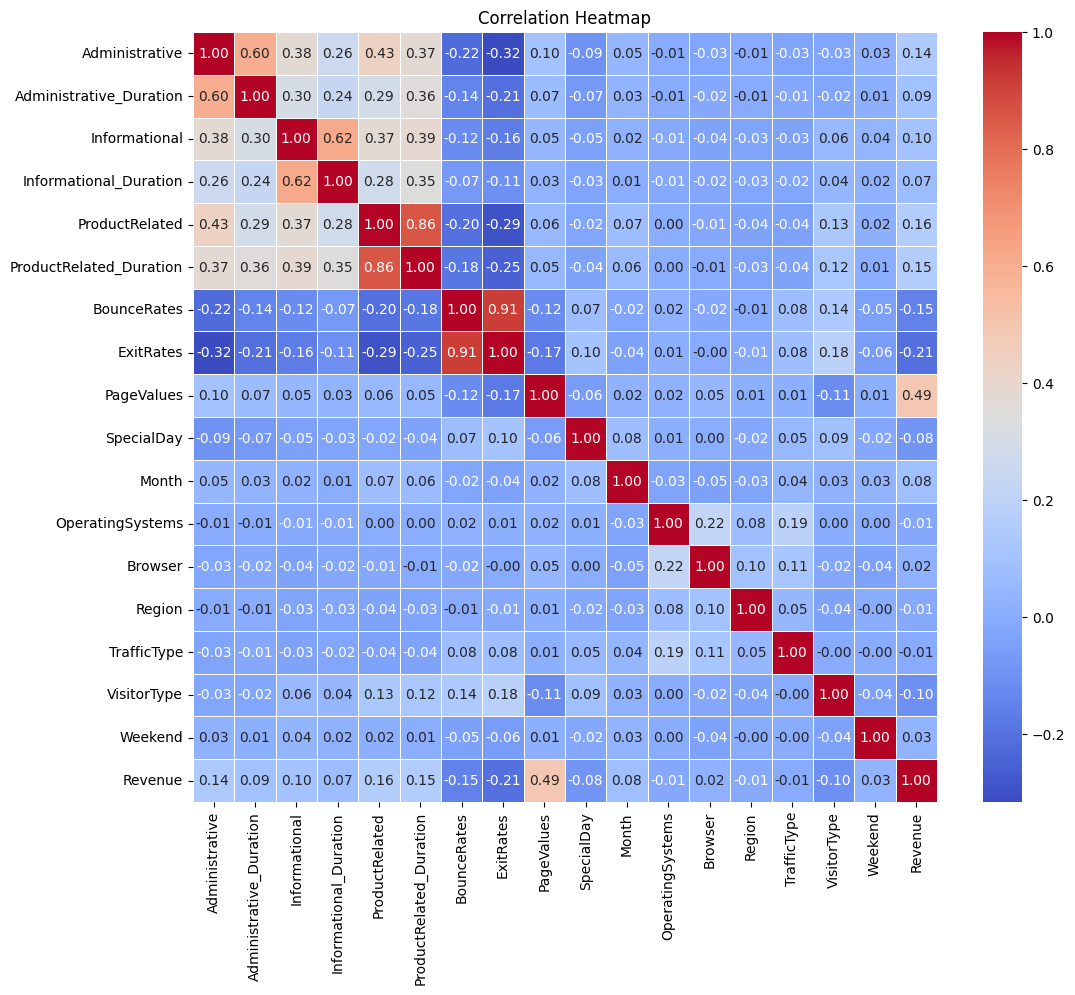

In [13]:
# correlation matrix
correlation_matrix = shopping_online.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Train Test Split

In [14]:
x_o=shopping_online.drop('Revenue',axis=1)
y_o=shopping_online['Revenue']

In [16]:
x_train_o,x_test_o,y_train_o,y_test_o=train_test_split(x_o,y_o,test_size=0.2,random_state=42,stratify=y_o)

### User Defined KNN Classifier

In [26]:
# Using distance metric - euclidean and k=3
class KNNClassifier:
    def __init__(self, k=3, distance='euclidean'):
        self.k = k
        self.distance = distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        distances = pairwise_distances(X, self.X_train, metric=self.distance)
        y_pred = [self._predict(dist) for dist in distances]
        return np.array(y_pred)

    def _predict(self, distances):
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common
    # for plotting ROC Curves
    def predict_proba(self, X):
        distances = pairwise_distances(X, self.X_train, metric=self.distance)
        y_probs = []
        for dist in distances:
            k_indices = np.argsort(dist)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            class_probs = [k_nearest_labels.count(c) / self.k for c in np.unique(self.y_train)]
            y_probs.append(class_probs)
        return np.array(y_probs)


- #### Euclidean distance

In [27]:
def KNN_user(k=3, distance="euclidean"):
    knn_classifier = KNNClassifier(k=3)
    knn_classifier.fit(x_train_o.values, y_train_o.values)
    y_pred = knn_classifier.predict(x_test_o.values)
    accuracy = np.mean(y_pred == y_test_o.values)
    return accuracy, knn_classifier

accuracy, knn_classifier = KNN_user(k=3)
print("Accuracy:", accuracy)

Accuracy: 0.8398215733982157


- #### Manhattan distance

In [28]:
        
def KNN_user(k=3, distance="manhattan"):
    knn_classifier = KNNClassifier(k=3)
    knn_classifier.fit(x_train_o.values, y_train_o.values)
    y_pred = knn_classifier.predict(x_test_o.values)
    accuracy = np.mean(y_pred == y_test_o.values)
    return accuracy, knn_classifier

accuracy, knn_classifier = KNN_user(k=3)
print("Accuracy:", accuracy)

Accuracy: 0.8398215733982157


- #### Minkowski Distance

In [29]:
def KNN_user(k=3, distance="minkowski"):
    knn_classifier = KNNClassifier(k=3)
    knn_classifier.fit(x_train_o.values, y_train_o.values)
    y_pred = knn_classifier.predict(x_test_o.values)
    accuracy = np.mean(y_pred == y_test_o.values)
    return accuracy, knn_classifier

accuracy, knn_classifier = KNN_user(k=3)
print("Accuracy:", accuracy)

Accuracy: 0.8398215733982157


### Plotting Results

In [24]:
# Function to plot ROC curve
def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{title} (area = %0.2f)' % roc_auc)

# Function to plot ROC curves for training and testing data on the same graph
def plot_roc_curves(x_train, y_train, x_test, y_test, k=5):
    distance_metrics = ['euclidean', 'manhattan', 'minkowski']
    plt.figure(figsize=(8, 6))
    
    for distance_metric in distance_metrics:
        knn_classifier = KNNClassifier(k=k, distance=distance_metric)
        knn_classifier.fit(x_train, y_train)
        y_train_prob = knn_classifier.predict_proba(x_train)[:, 1]
        y_test_prob = knn_classifier.predict_proba(x_test)[:, 1]

        plot_roc_curve(y_train, y_train_prob, f'Training {distance_metric.upper()}')
        plot_roc_curve(y_test, y_test_prob, f'Testing {distance_metric.upper()}')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Different Distance Metrics')
    plt.legend(loc="lower right")
    plt.show()




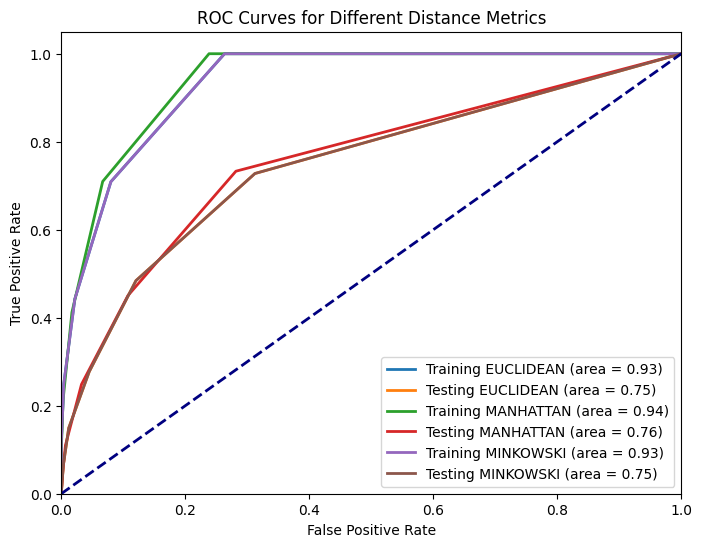

In [25]:
plot_roc_curves(x_train_o.values, y_train_o.values, x_test_o.values, y_test_o.values)

### Inferences

- From this experiment we can infer that KNN classification on different
distances(euclidean,manhattan and minkowski) yields more or less similar results of
slight variations.
- Also knn built from scratch yields accurate results of with accuracy 85%-87%
- Results depend on n closest of neighbors to be considered while training the model and
the random state while splitting training and testing data
- Also performing feature selection techniques in laso yield results upto 92%

### Learning Objectives

- Understood and implemented KNN classification from scratch
- Compared KNN from sklearn and user built KNN
- Understood the implemented different distance types(euclidean,manhattan,minkowski)